<a href="https://colab.research.google.com/github/mehrnazeraeisi/Spectral-Clustering/blob/main/Implement_Spectral_Clustering_3Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video Address: https://www.youtube.com/watch?v=YHz0PHcuJnk

# Why should we use Spectral Clustering?

In [3]:
import numpy as np
from sklearn.cluster import KMeans

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [5]:
n_samples=1500
random_state=170
X,y=make_blobs(n_samples=n_samples ,random_state=random_state
              )


Text(0.5, 1.0, 'Unlabeled data')

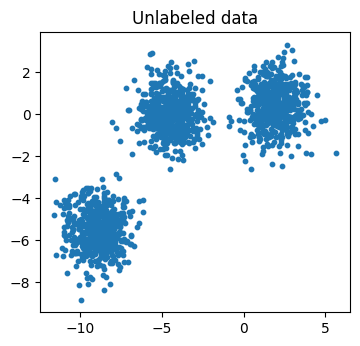

In [7]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X[: , 0] , X[: , 1]  , s=10)
plt.title("Unlabeled data")

In [8]:
# Anisotropicly distributed data

transformation=[[0.60834549  , -0.63667341] , [-0.40887718  , 0.85253229]]
X_aniso=np.dot(X ,transformation )

Text(0.5, 1.0, 'Unlabeled data')

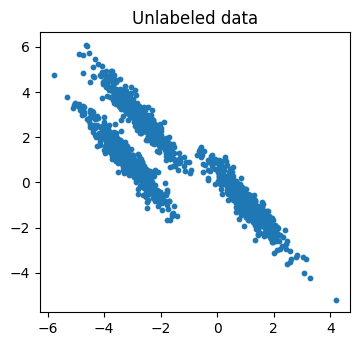

In [9]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[: , 0] , X_aniso[: , 1]  , s=10)
plt.title("Unlabeled data")

Text(0.5, 1.0, 'Labels returned by KMeans')

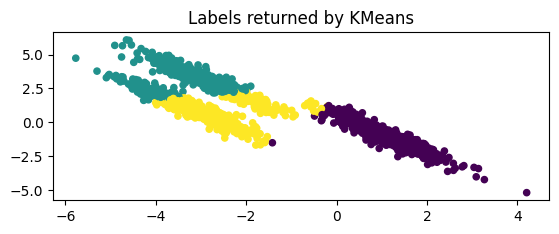

In [10]:
y_pred= KMeans(n_clusters=3 , random_state=random_state).fit_predict(X_aniso)

plt.subplot(212)
plt.scatter(X_aniso[: , 0] , X_aniso[: , 1], c=y_pred   ,s=20)
plt.title("Labels returned by KMeans")

### Converting a one-dimensional array into a two-dimensional array

In [ ]:
A=np.array([[1,2,3],[4,5,6],[3,4,5]])
D1array=np.array([1,2,3])
D2array=D1array[:, np.newaxis]

AD=np.multiply(A, D2array)
print(AD)

print(D2array)

[[ 1  2  3]
 [ 8 10 12]
 [ 9 12 15]]
[[1]
 [2]
 [3]]


# Step 1 : Form similarity graph and find M


In [ ]:
from scipy.spatial import distance

rbf_param=7.6

# Find M
K=np.exp(-rbf_param*distance.cdist(X_aniso , X_aniso  , metric='sqeuclidean'))

D=K.sum(axis=1)
D=np.sqrt(1/D)

M=np.multiply( D[ np.newaxis , : ] , np.multiply ( K , D[ : , np.newaxis] ))


# Step 2 : Eigenvalue decomposition of M

In [ ]:
from scipy import linalg
from sklearn.preprocessing import normalize

# EVD of M
U, Sigma, _ = linalg.svd( M , full_matrices=False , lapack_driver='gesvd')

Usubset= U[ : , 0:3]
y_pred_sc = KMeans (n_clusters = 3).fit_predict(normalize(Usubset))

Text(0.5, 1.0, 'Labels returned by Spectral Clustering')

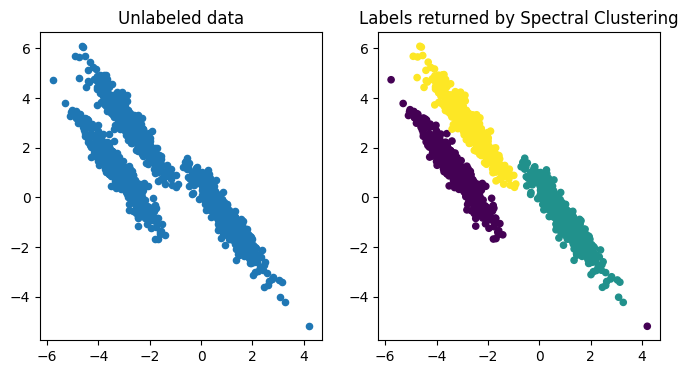

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(X_aniso[ : , 0 ] , X_aniso[ : , 1 ] , s = 20)
plt.title("Unlabeled data")

plt.subplot(122)
plt.scatter(X_aniso[ : , 0 ] , X_aniso[ : , 1 ] , c=y_pred_sc  , s = 20)
plt.title("Labels returned by Spectral Clustering")